# Natural Language Processing

### Agenda
- Previous architectures: RNNs, LSTMs
- Current architectures: Transformers
- Current tools: LLMs
- Fine-tuning LLMs


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2025/blob/main/SESSION4/DL_Bootcamp_Session4.ipynb)

# RNNs and LSTMs

Previously RNNs were a popular method used to process text. They were theoretically able to handle long-range dependencies well, but they were computationally inefficient. They frequently ran into vanishing / exploding gradients issues. They also processed sequentially, and hence could not be parallelized across GPUs.
> *Pop Quiz:* What is the vanishing gradients problem in DNNs? [Explanation](https://dennybritz.com/posts/wildml/recurrent-neural-networks-tutorial-part-3/)    
Why do you think it becomes a huge problem in RNNs?

__Long range problem :__ "Lionel Andrés "Leo" Messi was born in Argentina in 24 June 1987 and is a professional footballer who plays as a forward for and captains both Major League Soccer club Inter Miami and the national team. Messi speaks fluent <?>.”

__Unidirectional problem :__ "Mouse is really good. The mouse is used to <?> for the easy use of computers.”

The "attention" mechanism came about as a way to handle sequence length dependencies more efficiently.
- It can be parallelized, allowing us to use GPUs for training.
- It is computationally efficient, allowing us to process much larger models on larger datasets
- Can be used for classification, sequence generation, sequence labeling, translation etc.


# Transformers

## How to train a Transformer model?

# BERT
BERT stands for __B__idirectional __E__ncoder __R__epresentations from __T__ransformers. It is a way to create *representations* of text to be used with Transformer models.

Q: Is BERT a transformer?

A: BERT is a transformer-*based* model. It uses an encoder that is very similar to the original encoder of the transformer.


Q: Is BERT same as GPT?

A: BERT uses the encoder segment whereas GPT uses the decoder segment of a transformer.


BERT understands language by training for 2 NLP tasks *together*-
- Masked Language Model - "The [MASK1] brown fox [MASK2] over the lazy dog."
  
  BERT fills in the blanks.
- Next Sentence Prediction - "A: Harry Potter is a wizard."  B: He goes to the Hogwarts School of Witchcraft and Wizardry."   
BERT tries to answer if sentence B follows A.



## Word embeddings

Embeddings are a way to represent words as numbers. We want computers to not just read/write the words but also understand its meaning and context. A good word embedding model must cluster similar words together and establish a relationship between them.   


### One Hot Encoding

Corpus = "The quick brown fox jumps over the lazy dog"    
Vocabulary = ["the", "quick", "brown", "fox", "jumps", "over", "lazy", "dog"]   
OHE vector for "brown" = [0 0 1 0 0 0 0 0]   


### Word2Vec
Preserves word meaning and outputs a vector for each word.

Word vector for "brown" = [0.0012 0.1091 0.7386 0.0105 0.0585 0.0084 0.0057 0.0063]   

There is no *meaning* to these numbers, in terms of nouns, verbs etc.

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
# Example for word2Vec using Gensim.

import gensim
import gensim.downloader

google_news_vectors = gensim.downloader.load('word2vec-google-news-300')

# Example to find nearby words.

print("3 similar words to beautiful:")
words = google_news_vectors.most_similar("beautiful", topn=3)
for word in words:
  print(word)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
3 similar words to beautiful:
('gorgeous', 0.8353005051612854)
('lovely', 0.8106936812400818)
('stunningly_beautiful', 0.7329413294792175)


In [ ]:
# Finding Capital of Britain given Capital of France: (Paris - France) + Britain =

print("Finding Capital of Britain: (Paris - France) + Britain")
capital = google_news_vectors.most_similar(["Paris", "Britain"], ["France"], topn=1)
print(capital)

Finding Capital of Britain: (Paris - France) + Britain
[('London', 0.7541897892951965)]


In [ ]:
# Example to measure similarity.

cosine = google_news_vectors.similarity("king", "queen")
print("Cosine similarity between king and queen:", cosine)
print()

cosine = google_news_vectors.similarity("king", "rock")
print("Cosine similarity between king and rock:", cosine)

Cosine similarity between king and queen: 0.6510956

Cosine similarity between king and rock: 0.15652233


Exercise: Write your own Word2Vec model

In [ ]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

nltk.download("brown") # Explore other corpora here - https://www.nltk.org/nltk_data/

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    vector_size = 50,
    window = 10,
    epochs = 20,
)

# Vector for word
print("Vector for technology:")
print(model.wv["technology"])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Vector for technology:
[-0.9688862   0.10310964 -0.20853741 -1.1874305  -0.9636377   0.2265138
  0.00733536  1.1351587  -0.59506756  0.67629504 -0.05427287 -0.61641425
 -0.5363607   1.5604843   1.435222   -1.6460394   0.33442456 -1.0173604
 -0.98362243 -0.5275808  -0.5725927   0.5428547   1.2535537  -1.8873396
  0.31559956  0.34096602  0.43168715 -1.2814476   0.0131854   0.5794377
 -0.16200253 -1.2340531   0.07053946 -0.06280047 -0.571626    0.19969086
  0.4918659   0.43675834 -0.12302085 -0.5695272  -0.26130262 -1.020743
  0.87020785 -1.5879322   0.09667776 -0.35850227 -1.0279552  -0.6250815
 -0.6423902   0.67722684]


In [ ]:
import numpy as np

v1 = model.wv['education']
v2 = model.wv['is']

np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

0.18264654

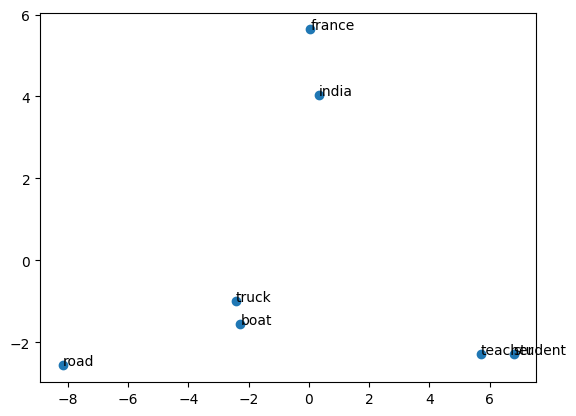

In [ ]:
#Visualizing data
words = ["france", "india", "truck", "boat", "road", "teacher", "student"]

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### BERT embeddings


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer(["hello, world!"])
print(tokens['input_ids'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[[101, 7592, 1010, 2088, 999, 102]]


BERT is a pretrained model that expects input data in a specific format.

- A special token, [SEP], to mark the end of a sentence, or the separation between two sentences
- A special token, [CLS], at the beginning of our text. This token is used for classification tasks, but *BERT expects it no matter what your application* is
- Keep sentences the same length using truncation or padding tokens [PAD]
- Mask IDs [MASK] to indicate which elements in the sequence are tokens and which are padding elements. When you add padding tokens to make sentences the same length, you also use an “attention mask.” This is like a map that helps BERT know which parts are actual words (marked as 1) and which are padding (marked as 0).
- Segment IDs used to distinguish different sentences
- Positional Embeddings used to show token position within the sequence


In [ ]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize the sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


The original word "embeddings" has been split into smaller subwords and characters. The two hash signs preceding some of these subwords are just the tokenizer's way to denote that this subword or character is part of a larger word and preceded by another subword. i.e., the '##bed' token is separate from the 'bed' token.

Why does it look this way?    
This is because the BERT tokenizer was created with a WordPiece model which has a fixed-size vocabulary of 30,000. So it tries to be efficient by reusing common prefixes and postfixes.

In [ ]:
# Map the token strings to their vocabulary indices.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indices.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
here          2,182
is            2,003
the           1,996
sentence      6,251
i             1,045
want          2,215
em            7,861
##bed         8,270
##ding        4,667
##s           2,015
for           2,005
.             1,012
[SEP]           102


In [ ]:
# !pip install bertviz
#Credit : https://github.com/jessevig/bertviz?tab=readme-ov-file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 588.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### GPT Embeddings

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2 = GPT2LMHeadModel.from_pretrained('gpt2')

context = tokenizer('It will rain in the', return_tensors='pt')

prediction = gpt2.generate(**context, max_length=10)
tokenizer.decode(prediction[0])

In [ ]:
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

sentences = ["It will rain in the",
            "I want to eat a big bowl of",
            "My dog is"]
inputs = tokenizer(sentences, return_tensors="pt", padding=True)

print(inputs)

In [ ]:
output_sequences = gpt2.generate(**inputs)

for seq in output_sequences:
    print(tokenizer.decode(seq))

### Pipelines
Hugging Face provides [pipelines](https://huggingface.co/docs/transformers/en/main_classes/pipelines) which make it easier for you to perform end-to-end tasks like machine translation, sentiment analysis, q&a etc. Pipelines mainly consist of a tokenizer and a task-specific model.

In [ ]:
# Example for using a Hugging Face pipeline to perform classification.

from transformers import pipeline

pipecl = pipeline("text-classification")
pipecl("This restaurant is awesome")

In [ ]:
# Example for using a Hugging Face pipeline to perform machine translation.

translator = ... # pipeline("translation_en_to_fr")
translation = translator("What's your name?")
print(translation)

In [ ]:
# Create a summarizer

import pandas as pd
import textwrap

!wget -nc https://www.dropbox.com/s/7hb8bwbtjmxovlc/bbc_text_cls.csv?dl=0
df = pd.read_csv('bbc_text_cls.csv?dl=0')
df.head()

In [ ]:
doc = df[df.labels == 'business']['text'].sample(random_state=123)

def wrap(x):
  return textwrap.fill(x, replace_whitespace = False, fix_sentence_endings = True)
print("Original: ")
print(wrap(doc.iloc[0]))

summarizer = pipeline('summarization')
print("Summary: ")
summarizer(doc.iloc[0].split('\n',1)[1])

# Fine-tuning Transformers

> Pop Quiz : Why pre-train a transformer?

> Pop Quiz : Why fine-tune a transformer?

NOTE: Fine-tuning BERT is done by adding a task-specific layer on top of BERT model and training. Whereas, fine-tuning GPT is done via task-specific prompts to adapt the model.

In [ ]:
! pip install -U accelerate
! pip install -U transformers
! pip install transformers datasets
! pip install evaluate

In [ ]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

The pretrained head of the BERT model is discarded, and replaced with a randomly initialized classification head. You will fine-tune this new model head on your sequence classification task.

In [ ]:
# Define your evaluation metrics

import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(output_dir="test_trainer",
                                  evaluation_strategy="epoch",
                                  logging_steps = 3,
                                  num_train_epochs=3,
                                  load_best_model_at_end=True)

# Define your Trainer object

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)

# Let the fine-tuning begin

trainer.train()

In [ ]:
predictions = trainer.predict(small_eval_dataset)
prediction_class = list(np.argmax(predictions.predictions, axis=-1))

print(wrap(small_eval_dataset[5]['text']))
print("Original label =",small_eval_dataset[5]['label'],"  Predicted label =", prediction_class[5])

In [ ]:
model.save_pretrained('final_model')
tokenizer.save_pretrained('final_model')

# mymodel = AutoModelForSequenceClassification.from_pretrained("./final_model/")

In [ ]:
classifier = ... # create pipeline using your local model
classifier(small_eval_dataset[5]['text'])